## This notebook shows how moment matching works on simple data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(12345)

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../Diploma')
from dkl import *

## First, we will generate some synthetic data from Normal distribution and with f(x) = x^2

In [3]:
data_gene = SyntheticData(np.square)
train_df = data_gene.create_train(0, 2, noize_sigma=1)  
test_df = data_gene.create_test(2, np.sqrt(2))

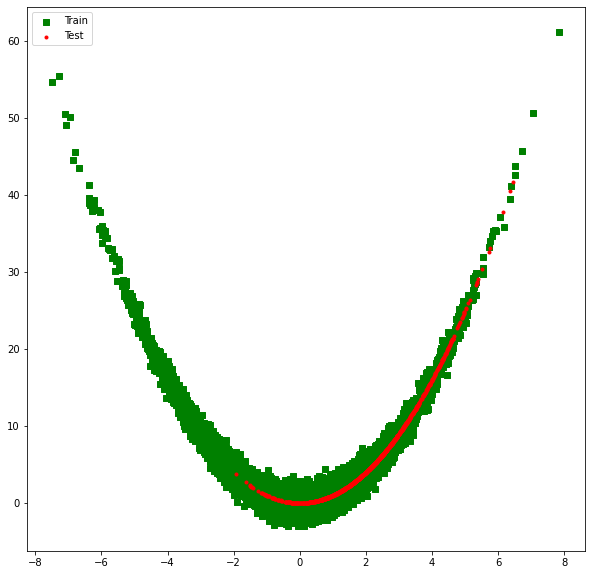

In [4]:
draw_data(train_df, test_df)

### Lets take a look at the X train vs test distributions

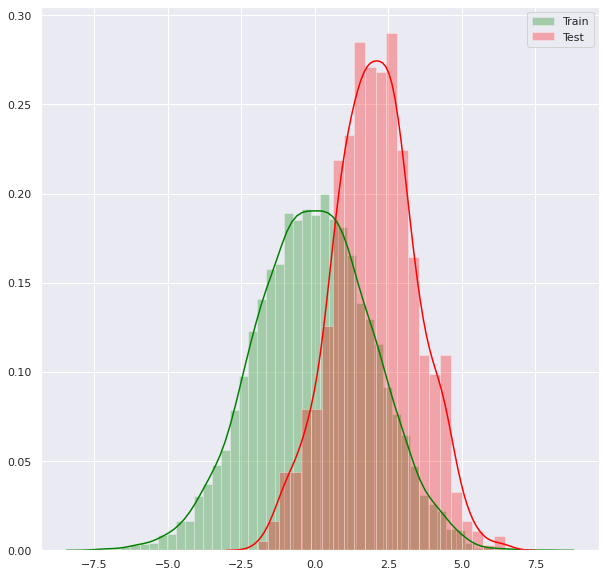

In [5]:
draw_distr(train_df['X'].to_numpy(), test_df['X'].to_numpy())

## Lets train base model a note the accuracy

In [6]:
val_data = ValidationData(train=train_df, test=test_df)
model_fcnet = CatBoost(target='Target', features=['X'])
folder = Folder()
trainer = Trainer(model_fcnet, folder, error='mae')
pred_basecase = trainer.train_predict(val_data)

Fold = 1 / 5
Training Model CatBoost with validation
X_train = (8000, 1) Y_train = (8000,)
X_valid = (2000, 1) Y_valid = (2000,)

Learning rate set to 0.044323
0:	learn: 5.3919825	test: 5.8008591	best: 5.8008591 (0)	total: 50.2ms	remaining: 1m 40s
100:	learn: 1.1788793	test: 1.3999270	best: 1.3999270 (100)	total: 307ms	remaining: 5.78s
200:	learn: 1.1652615	test: 1.3720130	best: 1.3720130 (200)	total: 504ms	remaining: 4.51s
300:	learn: 1.1612885	test: 1.3684905	best: 1.3684651 (290)	total: 772ms	remaining: 4.36s
400:	learn: 1.1584076	test: 1.3685344	best: 1.3682758 (317)	total: 1.01s	remaining: 4.04s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.368275814
bestIteration = 317

Shrink model to first 318 iterations.
Top features
X: 100.0
Predicting Model CatBoost
X = (2000, 1)

Error mae on Fold_1: 0.8844862917525318
Predicting Model CatBoost
X = (1000, 1)

Error mae on Test from Fold_1: 0.1998131839864062

Fold = 2 / 5
Training Model CatBoost with validation
X_trai

In [7]:
error_basecase_train = trainer._get_error_(train_df, pred_basecase.train)
error_basecase_test = trainer._get_error_(test_df, pred_basecase.test)

## Draw prediction

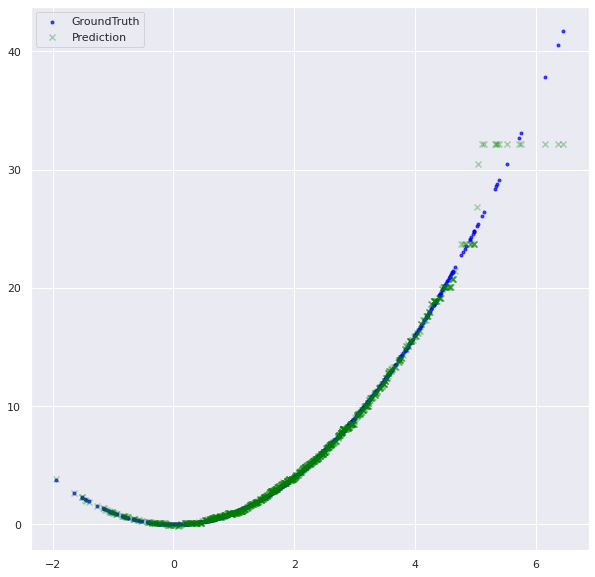

In [8]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(test_df['X'].to_numpy(), test_df['Target'].to_numpy(), c='blue', marker='.', alpha=0.7, label='GroundTruth')
plt.scatter(test_df['X'].to_numpy(), pred_basecase.test, c='green', marker='x', alpha=0.3, label='Prediction')
plt.legend(loc='upper left')
plt.show()


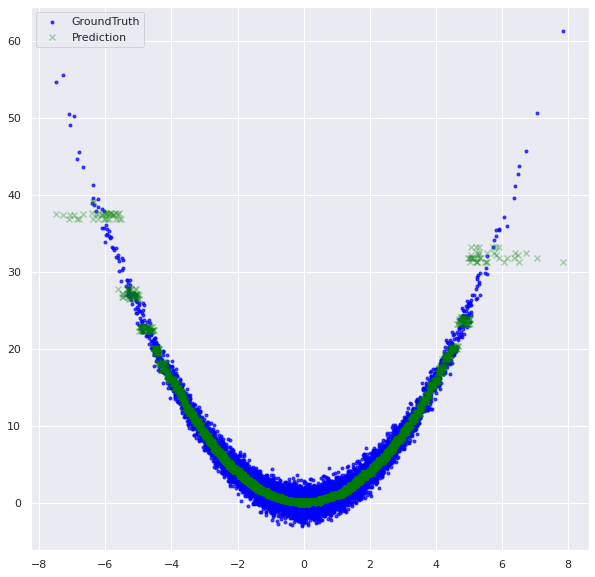

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(train_df['X'].to_numpy(), train_df['Target'].to_numpy(), c='blue', marker='.', alpha=0.7, label='GroundTruth')
plt.scatter(train_df['X'].to_numpy(), pred_basecase.train, c='green', marker='x', alpha=0.3, label='Prediction')
plt.legend(loc='upper left')
plt.show()

### DKL

In [10]:
funcs_dict = [('X', 1), ('X', 2)]
dkl_solver= Dkl_solver(funcs_dict)
p_1 = dkl_solver.make_weights(train_df, test_df)

      fun: 1.1584264620989514e-24
 hess_inv: array([[ 2.57386772e-03, -8.61713772e-05],
       [-8.61713772e-05,  2.88514937e-06]])
      jac: array([-3.04189384e-09, -9.13627524e-08])
  message: 'Optimization terminated successfully.'
     nfev: 65
      nit: 37
     njev: 65
   status: 0
  success: True
        x: array([ 0.16760041, -0.00332808])
data efficiency 0.5349771644789727


In [11]:
train_df['W'] = p_1*1e5

## Here we can see how moments matching works

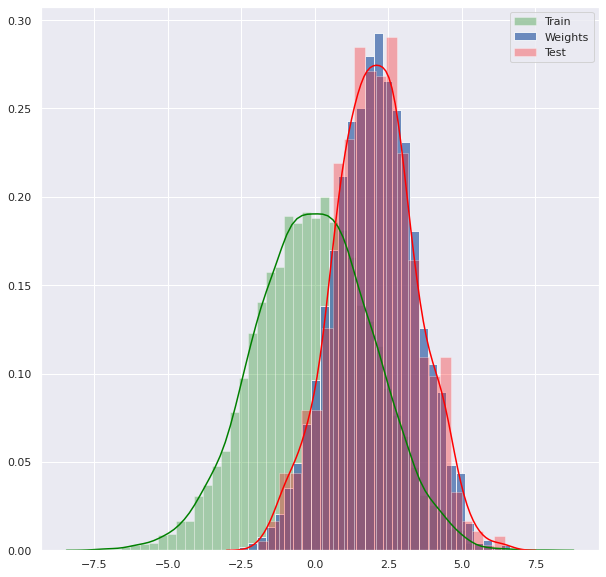

In [13]:
draw_distr(train_df['X'].to_numpy(), test_df['X'].to_numpy(), p_1)

## Lets train another model with respect to this weights

In [14]:
val_data = ValidationData(train=train_df, test=test_df)
model_fcnet = CatBoost(target='Target', features=['X'], weight='W')
folder = Folder()
trainer = Trainer(model_fcnet, folder, error='mae')
pred_1_dkl = trainer.train_predict(val_data)

Fold = 1 / 5
Training Model CatBoost with validation
X_train = (8000, 1) Y_train = (8000,)
X_valid = (2000, 1) Y_valid = (2000,)

Learning rate set to 0.044323
0:	learn: 6.0270300	test: 6.2712401	best: 6.2712401 (0)	total: 3.3ms	remaining: 6.6s
100:	learn: 1.2156233	test: 1.3981417	best: 1.3981417 (100)	total: 226ms	remaining: 4.24s
200:	learn: 1.2011010	test: 1.3720569	best: 1.3720569 (200)	total: 447ms	remaining: 4s
300:	learn: 1.1977840	test: 1.3681742	best: 1.3681742 (300)	total: 670ms	remaining: 3.78s
400:	learn: 1.1964120	test: 1.3674872	best: 1.3674872 (400)	total: 889ms	remaining: 3.54s
500:	learn: 1.1954491	test: 1.3668129	best: 1.3668129 (500)	total: 1.13s	remaining: 3.39s
600:	learn: 1.1947567	test: 1.3665908	best: 1.3665908 (600)	total: 1.32s	remaining: 3.08s
700:	learn: 1.1940511	test: 1.3664535	best: 1.3664367 (682)	total: 1.53s	remaining: 2.83s
800:	learn: 1.1931998	test: 1.3664723	best: 1.3663914 (749)	total: 1.75s	remaining: 2.62s
900:	learn: 1.1920735	test: 1.3664230	

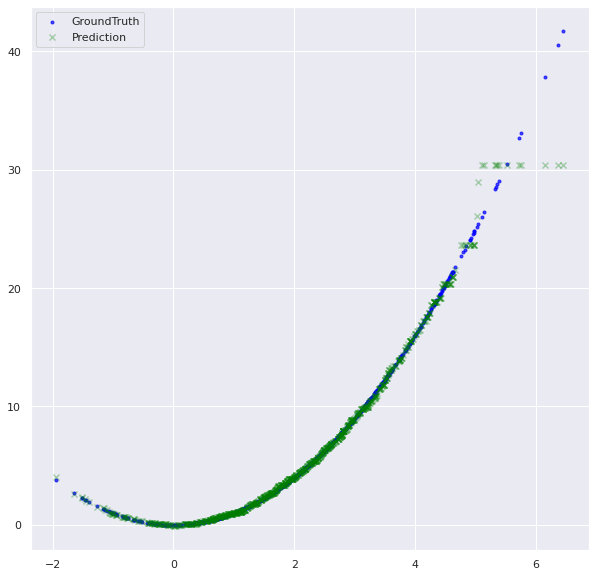

In [15]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(test_df['X'].to_numpy(), test_df['Target'].to_numpy(), c='blue', marker='.', alpha=0.7, label='GroundTruth')
plt.scatter(test_df['X'].to_numpy(), pred_1_dkl.test, c='green', marker='x', alpha=0.3, label='Prediction')
plt.legend(loc='upper left')
plt.show()

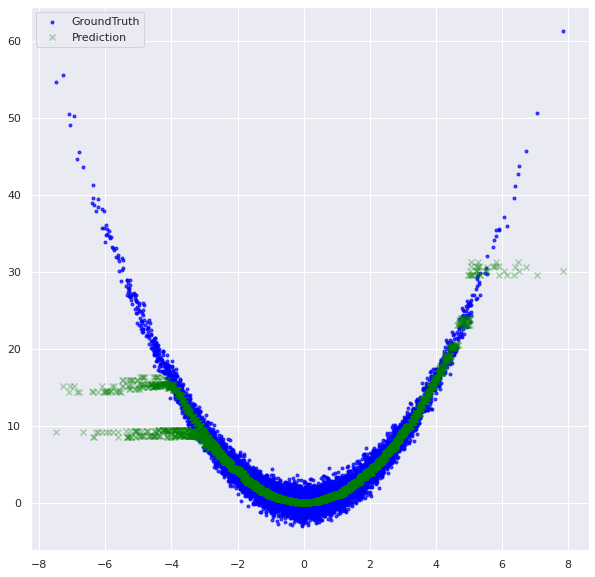

In [16]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(train_df['X'].to_numpy(), train_df['Target'].to_numpy(), c='blue', marker='.', alpha=0.7, label='GroundTruth')
plt.scatter(train_df['X'].to_numpy(), pred_1_dkl.train, c='green', marker='x', alpha=0.3, label='Prediction')
plt.legend(loc='upper left')
plt.show()

In [17]:
error_dkl_train = trainer._get_error_(train_df, pred_1_dkl.train)
error_dkl_test = trainer._get_error_(test_df, pred_1_dkl.test)

## Classifier
Next, we will try to train train-test classifier and use its output as a weights 

In [18]:
def ConcatTrainTest(data):
    label = 'Label'
    if not isinstance(data, ValidationData):
        raise Exception('Error: ConcatTrainTest works only with ValidationData, not with')
    train = data.train
    test = data.test
    train[label] = 0
    test[label] = 1
    train_test_df = pd.concat([train, test], axis=0, sort=False)
    train_test_df.reset_index(drop=True, inplace=True)
#     train_test_df[weights_col] /= 2
    return ValidationData(train=train_test_df)

In [19]:
val_data = ValidationData(train=train_df, test=test_df)
train_test_data = ConcatTrainTest(val_data)
model_fcnet = CatBoost(target='Label', features=['X'], mode='Classifier', objective='CrossEntropy')
folder = FolderStratified()
trainer = Trainer(model_fcnet, folder, error='logloss')
pred_classifier = trainer.train(train_test_data)

Fold = 1 / 5
Training Model CatBoost with validation
X_train = (8800, 1) Y_train = (8800,)
X_valid = (2200, 1) Y_valid = (2200,)

0:	learn: 0.6547292	test: 0.6547551	best: 0.6547551 (0)	total: 3.83ms	remaining: 7.65s
100:	learn: 0.2532946	test: 0.2508997	best: 0.2508997 (100)	total: 332ms	remaining: 6.24s
200:	learn: 0.2520279	test: 0.2508676	best: 0.2506238 (152)	total: 664ms	remaining: 5.94s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2506238261
bestIteration = 152

Shrink model to first 153 iterations.
Top features
X: 100.0
Predicting Model CatBoost
X = (2200, 1)

Error logloss on Fold_1: 0.25062382610257367

Fold = 2 / 5
Training Model CatBoost with validation
X_train = (8800, 1) Y_train = (8800,)
X_valid = (2200, 1) Y_valid = (2200,)

0:	learn: 0.6541688	test: 0.6546562	best: 0.6546562 (0)	total: 3.25ms	remaining: 6.5s
100:	learn: 0.2508826	test: 0.2605861	best: 0.2605717 (99)	total: 399ms	remaining: 7.49s
Stopped by overfitting detector  (100 iterations w

## Unexpected, but it works okay too

In [20]:
weights = pred_classifier.train.loc[val_data.train.index]

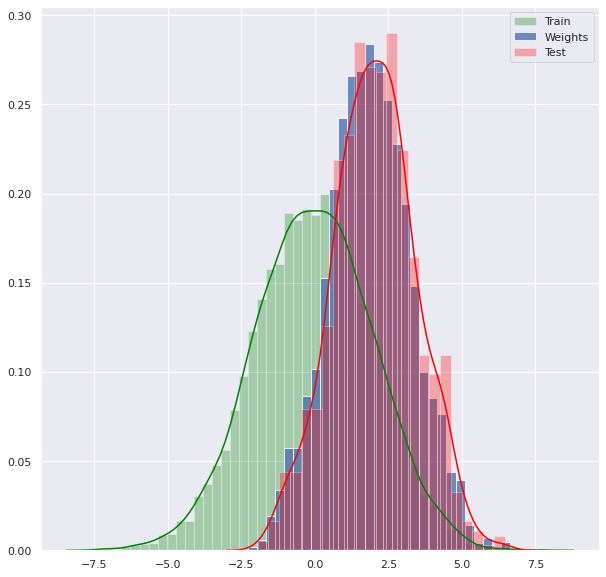

In [21]:
draw_distr(train_df['X'].to_numpy(), test_df['X'].to_numpy(), weights['Label'].to_numpy())

In [22]:
train_df['W'] = weights
val_data = ValidationData(train=train_df, test=test_df)
model_fcnet = CatBoost(target='Target', features=['X'], weight='W')
folder = Folder()
trainer = Trainer(model_fcnet, folder, error='mae')
pred_classifier_weights = trainer.train_predict(val_data)

Fold = 1 / 5
Training Model CatBoost with validation
X_train = (8000, 1) Y_train = (8000,)
X_valid = (2000, 1) Y_valid = (2000,)

Learning rate set to 0.044323
0:	learn: 5.9914368	test: 6.5229347	best: 6.5229347 (0)	total: 8.38ms	remaining: 16.8s
100:	learn: 1.2829543	test: 1.8386137	best: 1.8386137 (100)	total: 240ms	remaining: 4.51s
200:	learn: 1.2746422	test: 1.8251135	best: 1.8251135 (200)	total: 427ms	remaining: 3.82s
300:	learn: 1.2727688	test: 1.8221105	best: 1.8221105 (300)	total: 631ms	remaining: 3.56s
400:	learn: 1.2705300	test: 1.8170318	best: 1.8170318 (400)	total: 862ms	remaining: 3.44s
500:	learn: 1.2688139	test: 1.8124254	best: 1.8124254 (500)	total: 1.09s	remaining: 3.27s
600:	learn: 1.2681841	test: 1.8110937	best: 1.8110937 (600)	total: 1.32s	remaining: 3.07s
700:	learn: 1.2672548	test: 1.8092477	best: 1.8092477 (700)	total: 1.53s	remaining: 2.83s
800:	learn: 1.2663502	test: 1.8079878	best: 1.8079878 (800)	total: 1.73s	remaining: 2.59s
900:	learn: 1.2655675	test: 1.807

In [23]:
error_class_train = trainer._get_error_(train_df, pred_classifier_weights.train)
error_class_test = trainer._get_error_(test_df, pred_classifier_weights.test)

## Results

In [26]:
import plotly.graph_objects as go

methods = ['Basecase', 'Classifier', 'DKL']
errors_test = [error_basecase_test,  error_class_test, error_dkl_test] 
errors_train = [error_basecase_train,  error_class_train, error_dkl_train] 

In [27]:
fig_test = go.Figure([go.Bar(x=methods, y=errors_test, text=errors_test, textposition='auto')])
fig_test.update_layout(title_text='Test errors comparison')
fig_test.show()